In [13]:
#Read data into a frame
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/harsh/Documents/Upwork/Zoe/data.csv")
print(data.head())
print(data.shape)

   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

In [14]:
sum(data.apply(lambda x: sum(x.isnull().values), axis = 1) > 40)

48

In [15]:
#remove rows with many null values. 48 such rows are deleted
clean_data = data.dropna(how='all', subset=['Positioning', 'Vision', 'Marking', 'StandingTackle'])
clean_data.shape

(18159, 89)

In [16]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18159 non-null  int64  
 1   ID                        18159 non-null  int64  
 2   Name                      18159 non-null  object 
 3   Age                       18159 non-null  int64  
 4   Photo                     18159 non-null  object 
 5   Nationality               18159 non-null  object 
 6   Flag                      18159 non-null  object 
 7   Overall                   18159 non-null  int64  
 8   Potential                 18159 non-null  int64  
 9   Club                      17918 non-null  object 
 10  Club Logo                 18159 non-null  object 
 11  Value                     18159 non-null  object 
 12  Wage                      18159 non-null  object 
 13  Special                   18159 non-null  int64  
 14  Prefer

In [17]:
#convert height into cms
Height = ['0\'0' if isinstance(val, float) else val for val in clean_data['Height']]
Height = [(float(val[0])*12 + float(val[2:]))*2.5 if len(val) > 2 else 0 for val in Height]
clean_data['Height'] = Height

#convert wages to number
wg = clean_data['Wage'].str.replace(r'\D+', '')
clean_data['Wage'] = wg.astype(int) * 1000

#convert Weight to number
wt = clean_data['Weight'].str.replace(r'\D+', '')
clean_data['Weight'] = wt.astype(int) 


C:\Users\harsh\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harsh\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\harsh\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
#convert the value column to number
def convert_scale(value):
    if value.endswith("M"):
        return float(value[:-1]) * 10**6
    elif value.endswith("K"):
        return float(value[:-1]) * 10**3
    else:
        return float(value)

clean_data["Value"] = clean_data["Value"].str.replace('€', '').apply(convert_scale)
print(clean_data["Value"])

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18159, dtype: float64


C:\Users\harsh\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
#Details of the Heighest paid players
clean_data.nlargest(10, 'Wage')[['Name','Club', 'Wage', 'Overall', 'Potential', 'Nationality']]

,Name,Club,Wage,Overall,Potential,Nationality
0,L. Messi,FC Barcelona,565000,94,94,Argentina
7,L. Suárez,FC Barcelona,455000,91,91,Uruguay
6,L. Modrić,Real Madrid,420000,91,91,Croatia
1,Cristiano Ronaldo,Juventus,405000,94,94,Portugal
8,Sergio Ramos,Real Madrid,380000,91,91,Spain
4,K. De Bruyne,Manchester City,355000,91,92,Belgium
11,T. Kroos,Real Madrid,355000,90,90,Germany
36,G. Bale,Real Madrid,355000,88,88,Wales
5,E. Hazard,Chelsea,340000,91,91,Belgium
32,Coutinho,FC Barcelona,340000,88,89,Brazil


In [22]:
clean_data.nlargest(10, 'Overall')[['Name','Club', 'Wage', 'Overall', 'Potential', 'Nationality']]

,Name,Club,Wage,Overall,Potential,Nationality
0,L. Messi,FC Barcelona,565000,94,94,Argentina
1,Cristiano Ronaldo,Juventus,405000,94,94,Portugal
2,Neymar Jr,Paris Saint-Germain,290000,92,93,Brazil
3,De Gea,Manchester United,260000,91,93,Spain
4,K. De Bruyne,Manchester City,355000,91,92,Belgium
5,E. Hazard,Chelsea,340000,91,91,Belgium
6,L. Modrić,Real Madrid,420000,91,91,Croatia
7,L. Suárez,FC Barcelona,455000,91,91,Uruguay
8,Sergio Ramos,Real Madrid,380000,91,91,Spain
9,J. Oblak,Atlético Madrid,94000,90,93,Slovenia


In [68]:
clubs = clean_data.groupby(["Club"], as_index= False)['Wage'].agg(['max','mean','min'])
clubs.columns = (clubs.columns.str.replace('max','maximum').str.replace('min','minimum')
                  .str.replace('mean','average'))
clubs = clubs.reset_index()

#.reset_index()
#.agg(total=("Wage", "sum"), mean=("Wage", "mean"))
#clubs.columns = clubs.columns.get_level_values(0)
print(clubs)
clubs.info()

                      Club  maximum       average  minimum
0      SSV Jahn Regensburg     9000   4241.379310     1000
1    1. FC Heidenheim 1846    14000   4464.285714     1000
2     1. FC Kaiserslautern     4000   1692.307692     1000
3               1. FC Köln    26000  13285.714286     1000
4          1. FC Magdeburg    15000   4884.615385     1000
..                     ...      ...           ...      ...
646     Zagłębie Sosnowiec     2000   1080.000000     1000
647        Çaykur Rizespor    15000   6433.333333     1000
648              Örebro SK     4000   1481.481481     1000
649          Östersunds FK     8000   2045.454545     1000
650          Śląsk Wrocław     4000   2083.333333     1000

[651 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Club     651 non-null    object 
 1   maximum  651 non-null    int32  
 2   average

In [69]:
clubs_top10 = clubs.nlargest(10, 'average')
print(clubs_top10)

                  Club  maximum        average  minimum
470        Real Madrid   420000  152030.303030     9000
212       FC Barcelona   565000  146575.757576     4000
326           Juventus   405000  131680.000000     5000
374    Manchester City   355000  113363.636364     3000
375  Manchester United   260000  102757.575758     8000
134            Chelsea   340000   98454.545455     2000
363          Liverpool   255000   87939.393939     3000
583  Tottenham Hotspur   205000   79484.848485     3000
214  FC Bayern München   315000   78827.586207     2000
52             Arsenal   265000   78424.242424     4000


                 Club Variable          Value
0         Real Madrid  maximum  420000.000000
1        FC Barcelona  maximum  565000.000000
2            Juventus  maximum  405000.000000
3     Manchester City  maximum  355000.000000
4   Manchester United  maximum  260000.000000
5             Chelsea  maximum  340000.000000
6           Liverpool  maximum  255000.000000
7   Tottenham Hotspur  maximum  205000.000000
8   FC Bayern München  maximum  315000.000000
9             Arsenal  maximum  265000.000000
10        Real Madrid  average  152030.303030
11       FC Barcelona  average  146575.757576
12           Juventus  average  131680.000000
13    Manchester City  average  113363.636364
14  Manchester United  average  102757.575758
15            Chelsea  average   98454.545455
16          Liverpool  average   87939.393939
17  Tottenham Hotspur  average   79484.848485
18  FC Bayern München  average   78827.586207
19            Arsenal  average   78424.242424
20        Real Madrid  minimum    

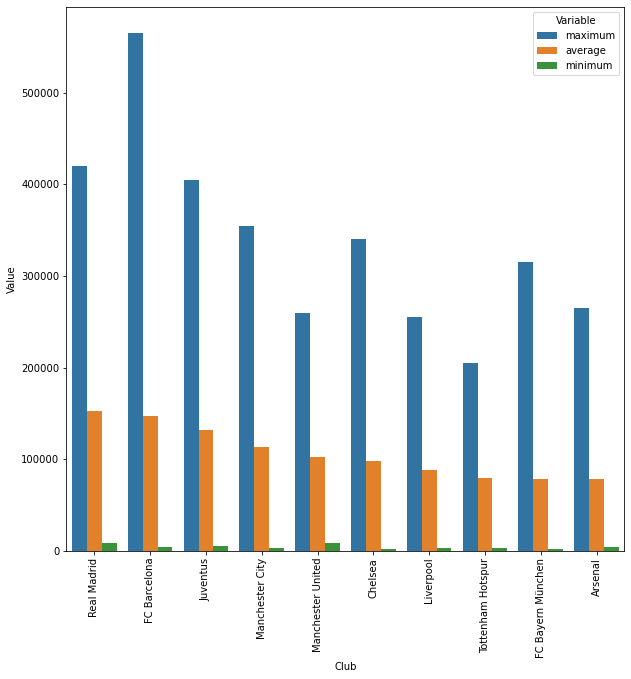

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 10))
plt.xticks(rotation = 90)
tidy = clubs_top10.melt(id_vars='Club').rename(columns=str.title)
print(tidy)
sns.barplot(x='Club', y='Value', hue='Variable', data=tidy, ax=ax1)
#sns.despine(fig)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

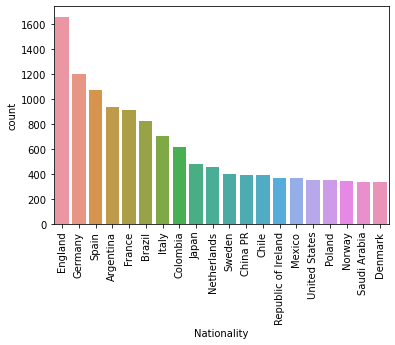

In [86]:
sns.countplot(x = 'Nationality', data=clean_data, order=clean_data['Nationality'].value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

              Nationality  maximum       average
42     Dominican Republic   140000  71000.000000
156  United Arab Emirates    39000  39000.000000
56                  Gabon   265000  26933.333333
7                 Armenia   145000  22000.000000
35                Croatia   420000  21682.539683
27   Central African Rep.    46000  19000.000000
13                Belgium   355000  18544.401544
2                 Algeria   205000  18083.333333
20                 Brazil   340000  17819.393939
47      Equatorial Guinea    65000  17200.000000
158               Uruguay   455000  17006.711409
44                  Egypt   255000  16870.967742
16                Bermuda    30000  16500.000000
139                 Spain   380000  16337.068161
150                  Togo    34000  16000.000000
77                 Israel    40000  15857.142857
147   São Tomé & Príncipe    15000  15000.000000
18     Bosnia Herzegovina   180000  14868.852459
105               Morocco   160000  14847.058824
121           Philip

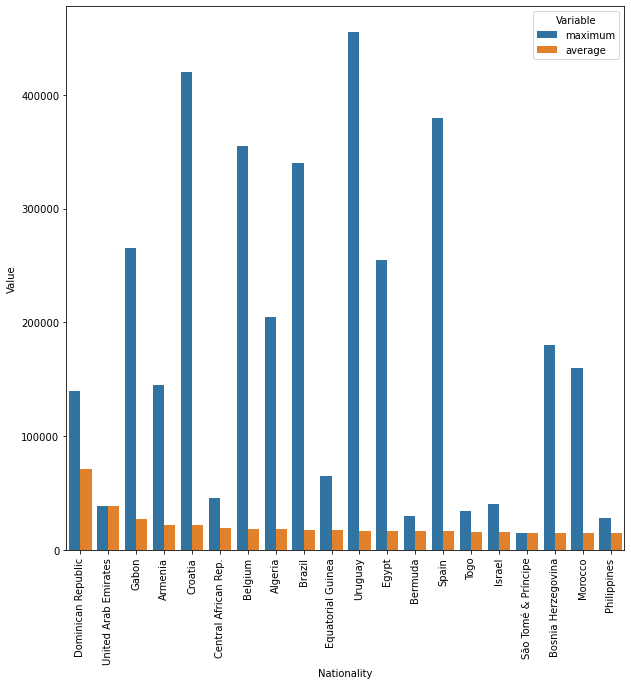

In [85]:
countries = clean_data.groupby(["Nationality"], as_index= False)['Wage'].agg(['max','mean'])
countries.columns = (countries.columns.str.replace('max','maximum')
                  .str.replace('mean','average'))
countries = countries.reset_index()
countries_top20 = countries.nlargest(20, 'average')
print(countries_top20)
fig, ax1 = plt.subplots(figsize=(10, 10))
plt.xticks(rotation = 90)
tidy = countries_top20.melt(id_vars='Nationality').rename(columns=str.title)
print(tidy)
sns.barplot(x='Nationality', y='Value', hue='Variable', data=tidy, ax=ax1)

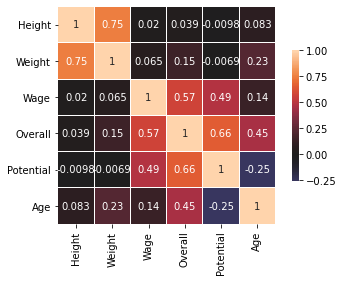

In [87]:
import seaborn as sns
#draw correlation plot between different factors
selected_attr = ['Height', 'Weight', 'Wage', 'Overall', 'Potential', 'Age']
corr = clean_data[selected_attr].corr()
sns.heatmap(corr,  center=0, annot=True,square=True, linewidths=.05, cbar_kws={"shrink": .6})

C:\Users\harsh\AppData\Local\R-MINI~1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

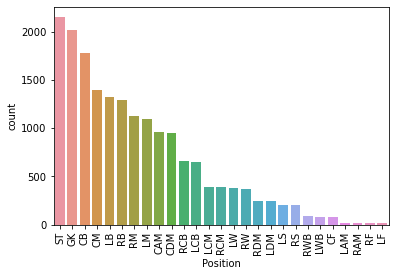

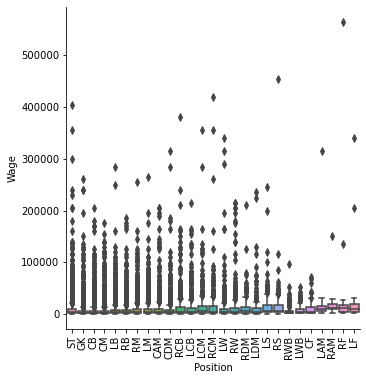

In [101]:
#does position affect overall rating and Wage
import matplotlib.pylab as plt
sns.countplot(clean_data['Position'], order = clean_data['Position'].value_counts().index)
plt.xticks(rotation=90)

sns.catplot(x = 'Position', y = 'Wage', data = clean_data, kind = 'box', order = clean_data['Position'].value_counts().index )
plt.xticks(rotation=90)

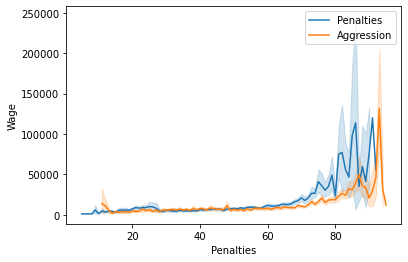

In [103]:
sns.lineplot(x= "Penalties", y = "Wage", data = clean_data)
sns.lineplot(x= "Aggression", y = "Wage", data = clean_data)
plt.legend(labels = ['Penalties', 'Aggression'])

In [107]:
clean_data[['Aggression','Wage']].corr()

,Aggression,Wage
Aggression,1.000000,0.194581
Wage,0.194581,1.000000


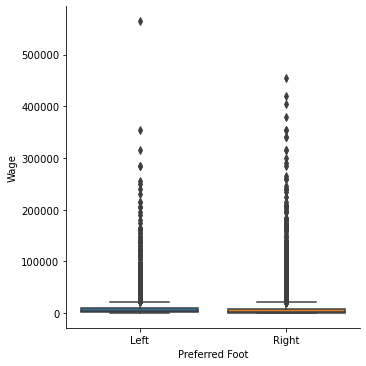

In [109]:
sns.catplot(x = "Preferred Foot", y = "Wage", kind = "box", data = clean_data)